(2, 224, 224)
torch.Size([2, 224, 224])
torch.Size([1, 2, 224, 224])
the total number of class =  2
torch.Size([2, 224, 224])
(2, 224, 224)


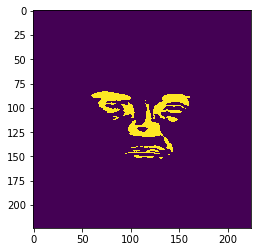

In [21]:
import numpy as np
import torch
from torchvision import transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
n_classes = 2
a = np.load('segmentation_output_array.npy')
a = torch.from_numpy(a)
a = a.permute(0,3,1,2)
reshaped_array = a.numpy()

#Change the number 0 till 5001 to see any segmentated mask stored in the array
for i in reshaped_array[0:]:
    i = i.astype('float32')
    final_array = torch.from_numpy(i)
    final_array = torch.unsqueeze(final_array,0)

    print('the total number of class = ',n_classes)

    probs = F.softmax(final_array,dim=1)[0]

    tf = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    full_mask = tf(probs.cpu()).squeeze()
    print(full_mask.shape)
    final = F.one_hot(full_mask.argmax(dim=0),2).permute(2,0,1).numpy()
    print(final.shape)

    plt.imshow(final[1],interpolation='nearest')
    plt.show()
    break

    

